# Digit Recognizer Kaggle Competition

### Trained on MNIST Dataset

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

2024-02-15 14:22:29.229036: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-15 14:22:29.281141: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 14:22:29.281182: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 14:22:29.282751: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-15 14:22:29.292276: I tensorflow/core/platform/cpu_feature_guar

### Case 1 - Train and test on entire set

In [2]:
# load the data
train1 = pd.read_csv('train.csv')
test1 = pd.read_csv('test.csv')

In [3]:
# Train Data
y_train = train1['label'].astype('float32')
X_train = train1.drop('label', axis=1).astype('int32')
X_test = test1.astype('int32')
X_train.shape, y_train.shape, X_test.shape

((42000, 784), (42000,), (28000, 784))

<Axes: xlabel='label', ylabel='count'>

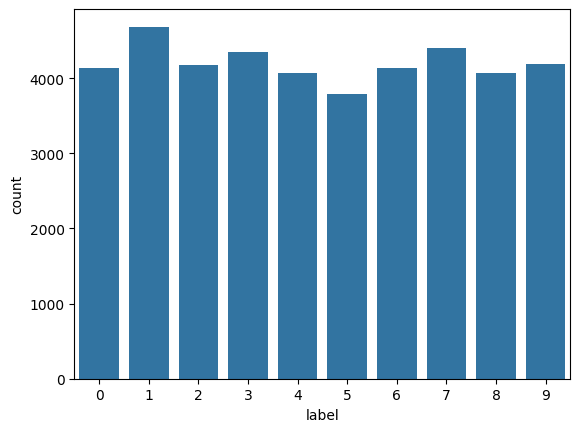

In [4]:
sns.countplot(x='label', data = train1)

In [5]:
#Data normalization
X_train = X_train/255
X_test = X_test/255

In [6]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
X_train.shape, X_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [7]:
# one-hot encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_train.shape

(42000, 10)

In [8]:
print(train1['label'].head())
y_train[0:5,:]

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

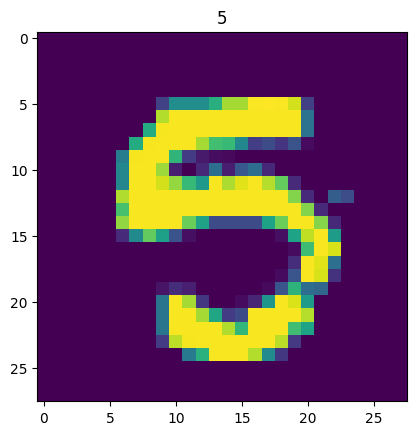

In [10]:
plt.imshow(X_train[1][:,:,0])
plt.title(y_train[1].argmax());

In [11]:
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

In [12]:
# Building a CNN model
input_shape = (28,28,1)
X_input = Input(input_shape)

# layer 1
x = Conv2D(64,(3,3),strides=(1,1),name='layer_conv1',padding='same')(X_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)
# layer 2
x = Conv2D(32,(3,3),strides=(1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)
# layer 3
x = Conv2D(32,(3,3),strides=(1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2), name='maxPool3')(x)
# fc
x = Flatten()(x)
x = Dense(64,activation ='relu',name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32,activation ='relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10,activation ='softmax',name='fc2')(x)

conv_model = Model(inputs=X_input, outputs=x, name='Predict')
conv_model.summary()


Model: "Predict"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 layer_conv1 (Conv2D)        (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 28, 28, 64)        0         
                                                                 
 maxPool1 (MaxPooling2D)     (None, 14, 14, 64)        0         
                                                                 
 layer_conv2 (Conv2D)        (None, 14, 14, 32)        18464     
                                                           

In [13]:
# Adam optimizer
conv_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_cv,y_cv))

Epoch 1/10
378/378 [==============================] - 8s 16ms/step - loss: 0.5794 - accuracy: 0.8144 - val_loss: 1.3297 - val_accuracy: 0.5229
Epoch 2/10
378/378 [==============================] - 6s 16ms/step - loss: 0.1322 - accuracy: 0.9632 - val_loss: 0.0625 - val_accuracy: 0.9831
Epoch 3/10
378/378 [==============================] - 6s 15ms/step - loss: 0.0945 - accuracy: 0.9736 - val_loss: 0.0551 - val_accuracy: 0.9821
Epoch 4/10
378/378 [==============================] - 6s 15ms/step - loss: 0.0754 - accuracy: 0.9797 - val_loss: 0.0532 - val_accuracy: 0.9836
Epoch 5/10
378/378 [==============================] - 6s 15ms/step - loss: 0.0627 - accuracy: 0.9822 - val_loss: 0.0755 - val_accuracy: 0.9783
Epoch 6/10
378/378 [==============================] - 6s 15ms/step - loss: 0.0547 - accuracy: 0.9847 - val_loss: 0.0419 - val_accuracy: 0.9883
Epoch 7/10
378/378 [==============================] - 6s 16ms/step - loss: 0.0516 - accuracy: 0.9853 - val_loss: 0.0556 - val_accuracy: 0.9869

In [14]:
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler

def learning_rate_schedule(epoch):
    initial_lr = 0.0005
    decay = 0.0
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1  # You can adjust the decay rate as needed

# SGD optimizer with momentum
sgd = SGD(learning_rate=0.0005, momentum=0.5, nesterov=False) 

# Compile model with SGD optimizer and categorical crossentropy loss
conv_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate schedule callback
lr_schedule = LearningRateScheduler(learning_rate_schedule)

# Train the model with learning rate schedule
conv_model.fit(X_train, y_train, epochs=30, validation_data=(X_cv, y_cv), callbacks=[lr_schedule])


Epoch 1/30
1182/1182 [==============================] - 13s 10ms/step - loss: 0.0289 - accuracy: 0.9923 - val_loss: 0.0370 - val_accuracy: 0.9900 - lr: 5.0000e-04
Epoch 2/30
1182/1182 [==============================] - 12s 10ms/step - loss: 0.0252 - accuracy: 0.9931 - val_loss: 0.0358 - val_accuracy: 0.9907 - lr: 5.0000e-04
Epoch 3/30
1182/1182 [==============================] - 11s 10ms/step - loss: 0.0229 - accuracy: 0.9937 - val_loss: 0.0361 - val_accuracy: 0.9914 - lr: 5.0000e-04
Epoch 4/30
1182/1182 [==============================] - 11s 10ms/step - loss: 0.0212 - accuracy: 0.9945 - val_loss: 0.0352 - val_accuracy: 0.9914 - lr: 5.0000e-04
Epoch 5/30
1182/1182 [==============================] - 12s 10ms/step - loss: 0.0214 - accuracy: 0.9937 - val_loss: 0.0350 - val_accuracy: 0.9907 - lr: 5.0000e-04
Epoch 6/30
1182/1182 [==============================] - 12s 10ms/step - loss: 0.0208 - accuracy: 0.9944 - val_loss: 0.0348 - val_accuracy: 0.9910 - lr: 5.0000e-04
Epoch 7/30
1182/1182 [

In [15]:
y_pred = conv_model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
my_submission = pd.DataFrame({'ImageId': list(range(1, len(y_pred)+1)), 'Label': y_pred})
my_submission.to_csv('submission.csv', index=False)

875/875 [==============================] - 3s 4ms/step


### Case 2 - Train on half of training set and test on the other half of training set

In [16]:
# Load Data
train2 = pd.read_csv('train_halfImages.csv')
test2 = pd.read_csv('test_halfImages.csv')

In [17]:
# Train Data
y_train = train1['label'].astype('float32')
X_train = train1.drop('label', axis=1).astype('int32')
X_test = test1.astype('int32')
X_train.shape, y_train.shape, X_test.shape

In [ ]:
sns.countplot(x='label', data = train1)

In [18]:
#Data normalization
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
X_train.shape, X_test.shape

In [ ]:
# one-hot encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_train.shape

In [ ]:
print(train1['label'].head())
y_train[0:5,:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

In [ ]:
plt.imshow(X_train[1][:,:,0])
plt.title(y_train[1].argmax());

In [ ]:
# Building a CNN model
input_shape = (28,28,1)
X_input = Input(input_shape)

# layer 1
x = Conv2D(64,(3,3),strides=(1,1),name='layer_conv1',padding='same')(X_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)
# layer 2
x = Conv2D(32,(3,3),strides=(1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)
# layer 3
x = Conv2D(32,(3,3),strides=(1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2), name='maxPool3')(x)
# fc
x = Flatten()(x)
x = Dense(64,activation ='relu',name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32,activation ='relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10,activation ='softmax',name='fc2')(x)

conv_model = Model(inputs=X_input, outputs=x, name='Predict')
conv_model.summary()


In [ ]:
# Adam optimizer
conv_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_cv,y_cv))

In [ ]:
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler

def learning_rate_schedule(epoch):
    initial_lr = 0.0005
    decay = 0.0
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1  # You can adjust the decay rate as needed

# SGD optimizer with momentum
sgd = SGD(learning_rate=0.0005, momentum=0.5, nesterov=False) 

# Compile model with SGD optimizer and categorical crossentropy loss
conv_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate schedule callback
lr_schedule = LearningRateScheduler(learning_rate_schedule)

# Train the model with learning rate schedule
conv_model.fit(X_train, y_train, epochs=30, validation_data=(X_cv, y_cv), callbacks=[lr_schedule])


In [ ]:
y_pred = conv_model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
my_submission = pd.DataFrame({'ImageId': list(range(1, len(y_pred)+1)), 'Label': y_pred})
my_submission.to_csv('submission2.csv', index=False)

### Case 3 - Train on lables 0-4 and test on other half of labels

In [19]:
# Load Data
train3 = pd.read_csv('train_halfDigits.csv')
test3 = pd.read_csv('test_halfDigits.csv')

In [20]:
# Train Data
y_train = train1['label'].astype('float32')
X_train = train1.drop('label', axis=1).astype('int32')
X_test = test1.astype('int32')
X_train.shape, y_train.shape, X_test.shape

In [21]:
sns.countplot(x='label', data = train1)

In [ ]:
#Data normalization
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
X_train.shape, X_test.shape

In [ ]:
# one-hot encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_train.shape

In [ ]:
print(train1['label'].head())
y_train[0:5,:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

In [ ]:
plt.imshow(X_train[1][:,:,0])
plt.title(y_train[1].argmax());

In [ ]:
# Building a CNN model
input_shape = (28,28,1)
X_input = Input(input_shape)

# layer 1
x = Conv2D(64,(3,3),strides=(1,1),name='layer_conv1',padding='same')(X_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)
# layer 2
x = Conv2D(32,(3,3),strides=(1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)
# layer 3
x = Conv2D(32,(3,3),strides=(1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2), name='maxPool3')(x)
# fc
x = Flatten()(x)
x = Dense(64,activation ='relu',name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32,activation ='relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10,activation ='softmax',name='fc2')(x)

conv_model = Model(inputs=X_input, outputs=x, name='Predict')
conv_model.summary()


In [ ]:
# Adam optimizer
conv_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_cv,y_cv))

In [ ]:
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler

def learning_rate_schedule(epoch):
    initial_lr = 0.0005
    decay = 0.0
    if epoch < 10:
        return initial_lr
    else:
        return initial_lr * 0.1  # You can adjust the decay rate as needed

# SGD optimizer with momentum
sgd = SGD(learning_rate=0.0005, momentum=0.5, nesterov=False) 

# Compile model with SGD optimizer and categorical crossentropy loss
conv_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate schedule callback
lr_schedule = LearningRateScheduler(learning_rate_schedule)

# Train the model with learning rate schedule
conv_model.fit(X_train, y_train, epochs=30, validation_data=(X_cv, y_cv), callbacks=[lr_schedule])


In [ ]:
y_pred = conv_model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
my_submission = pd.DataFrame({'ImageId': list(range(1, len(y_pred)+1)), 'Label': y_pred})
my_submission.to_csv('submission3.csv', index=False)